# DATASET 1 - Bank Data 

Table of contents:
(Using K fold implementation)
- Linear Kernal...............................................................................
- RBF Kernel..................................................................................
- Sigmoid Kernel..............................................................................
- Hyperparameter gamma vs Accuracy for RBF Kernel (varying C parameter).......................
- Hyperparameter gamma vs Accuracy for sigmoid Kernel(varying C parameter)....................

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import graphviz 
import pydotplus
import io
from scipy import misc
sns.set(color_codes=True)


In [47]:
df = pd.read_csv("C:\\ITM SPRING 2020\\New folder\\BANK_FULL.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [48]:
#creating Dummy variables for the columns default, housing, loan,marital, contact and p outcome

d1=pd.get_dummies(df['default'],drop_first=False).rename(columns=lambda x:'default_'+str(x))
d2=pd.get_dummies(df['housing'],drop_first=False).rename(columns=lambda x:'housing_'+str(x))
d3=pd.get_dummies(df['loan'],drop_first=False).rename(columns=lambda x:'loan_'+str(x))
d4=pd.get_dummies(df['marital'],drop_first=False).rename(columns=lambda x:'marital_' + str(x))
d5=pd.get_dummies(df['contact'],drop_first=False).rename(columns=lambda x:'contact_' + str(x))
d6=pd.get_dummies(df['poutcome'],drop_first=False).rename(columns=lambda x:'poutcome_' + str(x))
df.drop(columns =['marital','contact','poutcome','default','housing','loan'],inplace=True)
df=pd.concat([df,d1,d2,d3,d4,d5,d6], axis=1)





In [49]:
# performnig label encoding  for columsn job, education month and target variable. 
job_map       = {'management':1, 'technician':2, 'entrepreneur':3, 'blue-collar':4, 'unknown':5,
                 'retired':6, 'admin.':7 ,'services':8, 'self-employed':9, 'unemployed':10, 
                 'housemaid':11,'student':12}
education_map = {'tertiary':1 ,'secondary':2,'unknown':4, 'primary':3}
month_map     = {'may':5, 'jun':6, 'jul':7 ,'aug':8 ,'oct':10 ,'nov':11, 'dec':12, 'jan':1, 'feb':2 ,'mar':3, 'apr':4 ,'sep':9}
y_map         = {"no":0,"yes":1}

df["job_"]       = df.job.map(job_map)
df["education_"] = df.education.map(education_map)
df["month_"]     = df.month.map(month_map)
df["target"]     = df.y.map(y_map)
df.drop(columns  = ["job","education","month","y"],inplace=True)

data = df.copy()


In [50]:
#features =['poutcome_other', 'poutcome_success', 'poutcome_unknown','contact_telephone', 'contact_unknown', 'poutcome_failure','marital_married', 'marital_single', 'contact_cellular','loan_yes', 'job_', 'education_','marital_divorced', 'default_no', 'default_yes', 'housing_no', 'housing_yes','month_', 'loan_no','age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
#df_=df.sample(10000)

X_dataset=df.drop(columns='target')
y=df['target']

In [51]:
X_dataset.head()

,age,balance,day,duration,campaign,pdays,previous,default_no,default_yes,housing_no,...,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,job_,education_,month_
0,58,2143,5,261,1,-1,0,1,0,0,...,0,0,1,0,0,0,1,1,1,5
1,44,29,5,151,1,-1,0,1,0,0,...,0,0,1,0,0,0,1,2,2,5
2,33,2,5,76,1,-1,0,1,0,0,...,0,0,1,0,0,0,1,3,2,5
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,1,4,4,5
4,33,1,5,198,1,-1,0,1,0,1,...,0,0,1,0,0,0,1,5,4,5


In [52]:
from sklearn import preprocessing
X = preprocessing.scale(X_dataset)

In [53]:
X[0:1,:]

array([[ 1.60696496,  0.25641925, -1.29847633,  0.0110161 , -0.56935064,
        -0.41145311, -0.25194037,  0.13548989, -0.13548989, -0.89391541,
         0.89391541,  0.43680347, -0.43680347, -0.36077969,  0.81321217,
        -0.62809028, -1.35602988, -0.26209091,  1.57239532, -0.34868716,
        -0.20597248, -0.185948  ,  0.47251925, -1.13808302, -1.20648448,
        -0.47535364]])

# K fold implementation
..................Linear Kernal......................

C= 1e-05  Score = 0.8830151956773266
C= 0.0001  Score = 0.8869966157171408
C= 0.001  Score = 0.8906462507536371
C= 0.01  Score = 0.8859349037065238
C= 0.1  Score = 0.8854040477012152


<function matplotlib.pyplot.show(*args, **kw)>

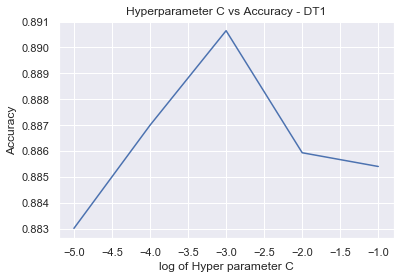

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
c_list = [.00001,.0001,.001,.01,.1]
accuracy_list = []
#precision_list = []
#recall_list = []
for i in c_list:
    from sklearn.svm import SVC
    svclassifier = SVC(kernel='linear',C=i)
    array_scores = cross_val_score(svclassifier,X,y,cv=5)
    array_mean = array_scores.mean()
    accuracy_list.append(array_mean)
    print('C=',i," Score =",array_mean)
    #recall = cross_val_score(svclassifier, X, y, cv=5, scoring='recall')
    #precision_list.append(precision.mean())
    #recall_list.append(recall.mean())
    

#print("Precision : ",precision_list.mean())
#print("Recall : ",recall_list.mean()) 
plt.plot(np.log10(c_list),accuracy_list)
plt.xlabel('log of Hyper parameter C')
plt.ylabel('Accuracy')  
plt.title('LINEAR: Hyperparameter C vs Accuracy - DT1')
plt.show

# ................................RBF Kernel......................

Gamma= 0.0001  Score = 0.8830151956773266
Gamma= 0.0005  Score = 0.8869966157171408
Gamma= 0.001  Score = 0.8919291527664661
Gamma= 0.01  Score = 0.8870408537175832
Gamma= 0.1  Score = 0.8603211014503855


<function matplotlib.pyplot.show(*args, **kw)>

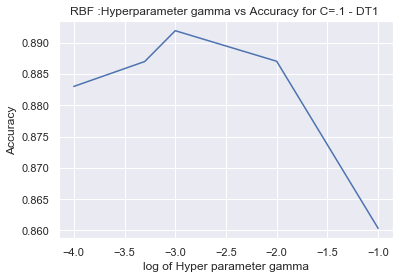

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
gamma_list = [.0001,.0005,.001,.01,.1]
accuracy_list = []
precision_list = []
recall_list = []
for i in gamma_list:
    from sklearn.svm import SVC
    svclassifier = SVC(kernel='rbf',C=.1,gamma=i)
    array_scores = cross_val_score(svclassifier,X,y,cv=5)
    array_mean = array_scores.mean()
    accuracy_list.append(array_mean)
    print('Gamma=',i," Score =",array_mean)
        
plt.plot(np.log10(gamma_list),accuracy_list,label='Training')
plt.xlabel('log of Hyper parameter gamma')
plt.ylabel('Accuracy')  
plt.title('RBF :Hyperparameter gamma vs Accuracy for C=.1 - DT1 ')
plt.show


# .......................Sigmoid Kernel................................

Gamma= 0.0001  Score = 0.8830151956773266
Gamma= 0.0005  Score = 0.8830151956773266
Gamma= 0.001  Score = 0.8869966157171408
Gamma= 0.01  Score = 0.8884343482855378
Gamma= 0.1  Score = 0.816369980258248


<function matplotlib.pyplot.show(*args, **kw)>

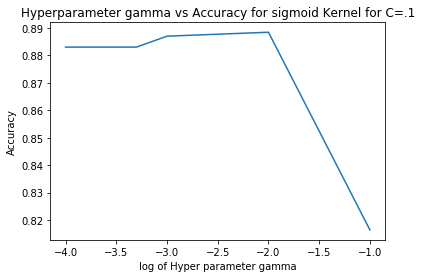

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
sigmoid_list = [.0001,.0005,.001,.01,.1]
accuracy_list = []
C_params = []
for i in sigmoid_list:
    from sklearn.svm import SVC
    svclassifier = SVC(kernel='sigmoid',C=.1,gamma=i)
    array_scores = cross_val_score(svclassifier,X,y,cv=5)
    array_mean = array_scores.mean()
    accuracy_list.append(array_mean)
    print('Gamma=',i," Score =",array_mean)
    
    
plt.plot(np.log10(sigmoid_list),accuracy_list,label='Training')
plt.xlabel('log of Hyper parameter gamma')
plt.ylabel('Accuracy')  
plt.title('SIGMOID:Hyperparameter gamma vs Accuracy for C=.1 - DT1')
plt.show


# Hyperparameter gamma vs Accuracy for RBF Kernel (varying C parameter)

C =  0.0001    Gamma =  0.0001  Score = 0.8830151956773266
C =  0.0001    Gamma =  0.001  Score = 0.8830151956773266
C =  0.0001    Gamma =  0.01  Score = 0.8830151956773266
C =  0.0001    Gamma =  0.1  Score = 0.8830151956773266
C =  0.001    Gamma =  0.0001  Score = 0.8830151956773266
C =  0.001    Gamma =  0.001  Score = 0.8830151956773266
C =  0.001    Gamma =  0.01  Score = 0.8830151956773266
C =  0.001    Gamma =  0.1  Score = 0.8830151956773266
C =  0.01    Gamma =  0.0001  Score = 0.8830151956773266
C =  0.01    Gamma =  0.001  Score = 0.8830151956773266
C =  0.01    Gamma =  0.01  Score = 0.8868417827155923
C =  0.01    Gamma =  0.1  Score = 0.8830151956773266
C =  0.1    Gamma =  0.0001  Score = 0.8830151956773266
C =  0.1    Gamma =  0.001  Score = 0.8919291527664661
C =  0.1    Gamma =  0.01  Score = 0.8870408537175832
C =  0.1    Gamma =  0.1  Score = 0.8603211014503855


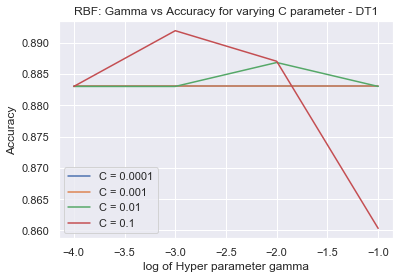

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
gamma_list = [.0001,.001,.01,.1]
accuracy_list = []
C_list = [.0001, .001, .01, .1]

for i in C_list:
    array_mean = 0
    accuracy_list = []
    for j in gamma_list:
        from sklearn.svm import SVC
        svclassifier = SVC(kernel='rbf',C=i,gamma=j)
        array_scores = cross_val_score(svclassifier,X,y,cv=5)
        array_mean = array_scores.mean()
        accuracy_list.append(array_mean)
        print('C = ', i , '   Gamma = ',j," Score =",array_mean)

    plt.plot(np.log10(gamma_list),accuracy_list,label='C = '+str(i))
    plt.xlabel('log of Hyper parameter gamma')
    plt.ylabel('Accuracy')  
    plt.title('RBF: Gamma vs Accuracy for varying C parameter - DT1')
    plt.legend()
    plt.show


# Hyperparameter gamma vs Accuracy for sigmoid Kernel(varying C parameter)

C =  0.0001    Gamma =  0.0001  Score = 0.8830151956773266
C =  0.0001    Gamma =  0.001  Score = 0.8830151956773266
C =  0.0001    Gamma =  0.01  Score = 0.8830151956773266
C =  0.0001    Gamma =  0.1  Score = 0.8830151956773266
C =  0.001    Gamma =  0.0001  Score = 0.8830151956773266
C =  0.001    Gamma =  0.001  Score = 0.8830151956773266
C =  0.001    Gamma =  0.01  Score = 0.8830151956773266
C =  0.001    Gamma =  0.1  Score = 0.8830151956773266
C =  0.01    Gamma =  0.0001  Score = 0.8830151956773266
C =  0.01    Gamma =  0.001  Score = 0.8830151956773266
C =  0.01    Gamma =  0.01  Score = 0.8865984737131594
C =  0.01    Gamma =  0.1  Score = 0.8637711200312752
C =  0.1    Gamma =  0.0001  Score = 0.8830151956773266
C =  0.1    Gamma =  0.001  Score = 0.8869966157171408
C =  0.1    Gamma =  0.01  Score = 0.8884343482855378
C =  0.1    Gamma =  0.1  Score = 0.816369980258248


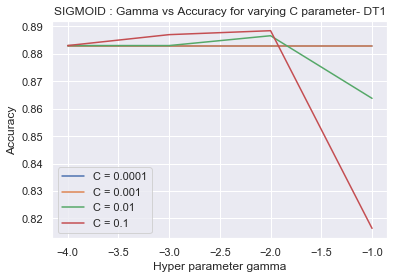

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
sigmoid_list = [.0001,.001,.01,.1]
accuracy_list = []
C_list = [.0001, .001, .01, .1]

for i in C_list:
    array_mean = 0
    accuracy_list = []
    for j in sigmoid_list:
        from sklearn.svm import SVC
        svclassifier = SVC(kernel='sigmoid',C=i,gamma=j)
        array_scores = cross_val_score(svclassifier,X,y,cv=5)
        array_mean = array_scores.mean()
        accuracy_list.append(array_mean)
        print('C = ', i , '   Gamma = ',j," Score =",array_mean)

    plt.plot(np.log10(sigmoid_list),accuracy_list,label='C = '+str(i))
    plt.xlabel('Hyper parameter gamma')
    plt.ylabel('Accuracy')  
    plt.title('SIGMOID : Gamma vs Accuracy for varying C parameter- DT1')
    plt.legend()
    plt.show

# GRID SEARCH TO FIND THE BEST PARAMETERS

In [39]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.0001,.0005,.001,.01,.1], 
              'gamma': [0.0001,.0005,.001,.01,.1],
              'kernel': ['linear','rbf', 'sigmoid']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X,y)
print(grid.best_estimator_)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] C=0.0001, gamma=0.0001, kernel=linear ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ C=0.0001, gamma=0.0001, kernel=linear, total=   9.4s
[CV] C=0.0001, gamma=0.0001, kernel=linear ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.4s remaining:    0.0s


[CV] ............ C=0.0001, gamma=0.0001, kernel=linear, total=  12.5s
[CV] C=0.0001, gamma=0.0001, kernel=linear ...........................
[CV] ............ C=0.0001, gamma=0.0001, kernel=linear, total=  12.6s
[CV] C=0.0001, gamma=0.0001, kernel=linear ...........................
[CV] ............ C=0.0001, gamma=0.0001, kernel=linear, total=  10.9s
[CV] C=0.0001, gamma=0.0001, kernel=linear ...........................
[CV] ............ C=0.0001, gamma=0.0001, kernel=linear, total=  12.5s
[CV] C=0.0001, gamma=0.0001, kernel=rbf ..............................
[CV] ............... C=0.0001, gamma=0.0001, kernel=rbf, total=  16.7s
[CV] C=0.0001, gamma=0.0001, kernel=rbf ..............................
[CV] ............... C=0.0001, gamma=0.0001, kernel=rbf, total=  17.0s
[CV] C=0.0001, gamma=0.0001, kernel=rbf ..............................
[CV] ............... C=0.0001, gamma=0.0001, kernel=rbf, total=  16.5s
[CV] C=0.0001, gamma=0.0001, kernel=rbf ..............................
[CV] .

[CV] ............. C=0.0001, gamma=0.01, kernel=sigmoid, total=  17.7s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] ............... C=0.0001, gamma=0.1, kernel=linear, total=  10.8s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] ............... C=0.0001, gamma=0.1, kernel=linear, total=  11.9s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] ............... C=0.0001, gamma=0.1, kernel=linear, total=  12.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] ............... C=0.0001, gamma=0.1, kernel=linear, total=  11.5s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] ............... C=0.0001, gamma=0.1, kernel=linear, total=  12.0s
[CV] C=0.0001, gamma=0.1, kernel=rbf .................................
[CV] .................. C=0.0001, gamma=0.1, kernel=rbf, total=  17.1s
[CV] C=0.0001, gamma=0.1, kernel=rbf .................................
[CV] .

[CV] ............ C=0.0005, gamma=0.001, kernel=sigmoid, total=  18.3s
[CV] C=0.0005, gamma=0.001, kernel=sigmoid ...........................
[CV] ............ C=0.0005, gamma=0.001, kernel=sigmoid, total=  19.3s
[CV] C=0.0005, gamma=0.001, kernel=sigmoid ...........................
[CV] ............ C=0.0005, gamma=0.001, kernel=sigmoid, total=  19.3s
[CV] C=0.0005, gamma=0.01, kernel=linear .............................
[CV] .............. C=0.0005, gamma=0.01, kernel=linear, total=   9.5s
[CV] C=0.0005, gamma=0.01, kernel=linear .............................
[CV] .............. C=0.0005, gamma=0.01, kernel=linear, total=  10.2s
[CV] C=0.0005, gamma=0.01, kernel=linear .............................
[CV] .............. C=0.0005, gamma=0.01, kernel=linear, total=  12.0s
[CV] C=0.0005, gamma=0.01, kernel=linear .............................
[CV] .............. C=0.0005, gamma=0.01, kernel=linear, total=  12.8s
[CV] C=0.0005, gamma=0.01, kernel=linear .............................
[CV] .

[CV] ............ C=0.001, gamma=0.0005, kernel=sigmoid, total=  22.0s
[CV] C=0.001, gamma=0.0005, kernel=sigmoid ...........................
[CV] ............ C=0.001, gamma=0.0005, kernel=sigmoid, total=  20.1s
[CV] C=0.001, gamma=0.0005, kernel=sigmoid ...........................
[CV] ............ C=0.001, gamma=0.0005, kernel=sigmoid, total=  19.9s
[CV] C=0.001, gamma=0.0005, kernel=sigmoid ...........................
[CV] ............ C=0.001, gamma=0.0005, kernel=sigmoid, total=  25.2s
[CV] C=0.001, gamma=0.0005, kernel=sigmoid ...........................
[CV] ............ C=0.001, gamma=0.0005, kernel=sigmoid, total=  21.9s
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV] .............. C=0.001, gamma=0.001, kernel=linear, total=  11.6s
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV] .............. C=0.001, gamma=0.001, kernel=linear, total=  11.2s
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV] .

[CV] ................. C=0.01, gamma=0.0001, kernel=rbf, total=  18.1s
[CV] C=0.01, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=0.01, gamma=0.0001, kernel=rbf, total=  18.8s
[CV] C=0.01, gamma=0.0001, kernel=sigmoid ............................
[CV] ............. C=0.01, gamma=0.0001, kernel=sigmoid, total=  17.4s
[CV] C=0.01, gamma=0.0001, kernel=sigmoid ............................
[CV] ............. C=0.01, gamma=0.0001, kernel=sigmoid, total=  17.6s
[CV] C=0.01, gamma=0.0001, kernel=sigmoid ............................
[CV] ............. C=0.01, gamma=0.0001, kernel=sigmoid, total=  18.2s
[CV] C=0.01, gamma=0.0001, kernel=sigmoid ............................
[CV] ............. C=0.01, gamma=0.0001, kernel=sigmoid, total=  18.6s
[CV] C=0.01, gamma=0.0001, kernel=sigmoid ............................
[CV] ............. C=0.01, gamma=0.0001, kernel=sigmoid, total=  18.9s
[CV] C=0.01, gamma=0.0005, kernel=linear .............................
[CV] .

[CV] .................... C=0.01, gamma=0.1, kernel=rbf, total=  25.4s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=0.01, gamma=0.1, kernel=rbf, total=  26.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=0.01, gamma=0.1, kernel=rbf, total=  23.5s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=0.01, gamma=0.1, kernel=rbf, total=  28.9s
[CV] C=0.01, gamma=0.1, kernel=sigmoid ...............................
[CV] ................ C=0.01, gamma=0.1, kernel=sigmoid, total=  26.1s
[CV] C=0.01, gamma=0.1, kernel=sigmoid ...............................
[CV] ................ C=0.01, gamma=0.1, kernel=sigmoid, total=  33.4s
[CV] C=0.01, gamma=0.1, kernel=sigmoid ...............................
[CV] ................ C=0.01, gamma=0.1, kernel=sigmoid, total=  30.1s
[CV] C=0.01, gamma=0.1, kernel=sigmoid ...............................
[CV] .

[CV] ................. C=0.1, gamma=0.01, kernel=linear, total=  16.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=  22.4s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=  20.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=  20.7s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=  18.7s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=  18.7s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=  33.7s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed: 113.2min finished


SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [40]:
print(grid.best_estimator_)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [54]:
svclassifier = SVC(kernel='rbf',C=0.1,gamma=0.001)
array_scores = cross_val_score(svclassifier,X,y,cv=5)
Accuracy = array_scores.mean()
print(Accuracy)

0.8919291527664661


# DATASET 2 - GPU Runtime Data

Table of contents: 
(Using K fold implementation)

- Linear Kernal...................................................
- RBF Kernel.......................................................................
- Sigmoid Kernel..............................................................................
- Hyperparameter gamma vs Accuracy for RBF Kernel (varying C parameter).......................
- Hyperparameter gamma vs Accuracy for sigmoid Kernel(varying C parameter)....................

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 

#importing the data
dt = pd.read_csv("C:\\ITM SPRING 2020\\ML\\sgemm_product_dataset\\processed_sgemm_product.csv")
df = dt.copy()

#classifying numeric runtime into two classes. Run time higher than 250 is 0 and lower will be 1
df['target'] = np.where(df['MeanRun']>250, 0, 1)

#dropping the numeric target column
df.drop('MeanRun',axis=1,inplace=True)

#As SVM takes long time to run, sampling only 25000 records for running this algorithm
dt = df.sample(n = 25000)

#
X_dataset=dt.drop(columns=['target'])
y=dt['target']

from sklearn import preprocessing
X = preprocessing.scale(X_dataset)


# ......................LINEAR KERNEL......................

C= 1e-05   Score = 0.7643599999999999
C= 0.0001   Score = 0.7643599999999999
C= 0.001   Score = 0.9434799999999999
C= 0.01   Score = 0.9507999999999999
C= 0.1   Score = 0.9552799999999999


<function matplotlib.pyplot.show(*args, **kw)>

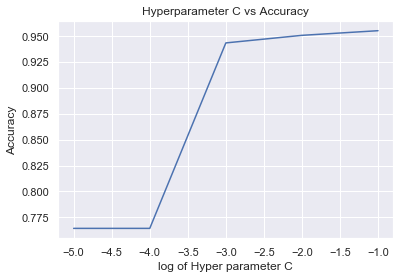

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
sns.set(color_codes=False)
c_list = [.00001,.0001,.001,.01,.1]
accuracy_list = []
C_params = []
for i in c_list:
    from sklearn.svm import SVC
    svclassifier = SVC(kernel='linear',C=i)
    array_scores = cross_val_score(svclassifier,X,y,cv=5)
    array_mean = array_scores.mean()
    accuracy_list.append(array_mean)
    print('C=',i,"  Score =",array_mean)
    
plt.plot(np.log10(c_list),accuracy_list)
plt.xlabel('log of Hyper parameter C')
plt.ylabel('Accuracy')  
plt.title('Hyperparameter C vs Accuracy')
plt.show

# .............RBF KERNEL....................

Gamma= 0.0001  Score = 0.7679199999999999
Gamma= 0.0005  Score = 0.7679199999999999
Gamma= 0.001  Score = 0.7921999999999999
Gamma= 0.01  Score = 0.9490000000000001
Gamma= 0.1  Score = 0.9571999999999999


<function matplotlib.pyplot.show(*args, **kw)>

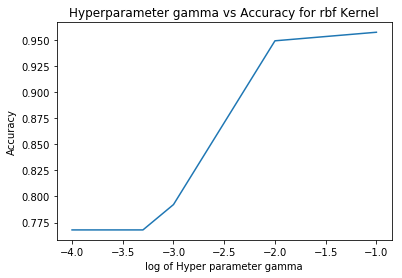

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
gamma_list = [.0001,.0005,.001,.01,.1]
accuracy_list = []
for i in gamma_list:
    from sklearn.svm import SVC
    svclassifier = SVC(kernel='rbf',C=.1,gamma=i)
    array_scores = cross_val_score(svclassifier,X,y,cv=5)
    array_mean = array_scores.mean()
    accuracy_list.append(array_mean)
    print('Gamma=',i," Score =",array_mean)
    
    
plt.plot(np.log10(gamma_list),accuracy_list,label='Training')
plt.xlabel('log of Hyper parameter gamma')
plt.ylabel('Accuracy')  
plt.title('Hyperparameter gamma vs Accuracy for rbf Kernel')
plt.show


# .......................Sigmoid Kernel................................

Gamma= 0.0001  Score = 0.7679199999999999
Gamma= 0.0005  Score = 0.7679199999999999
Gamma= 0.001  Score = 0.7679199999999999
Gamma= 0.01  Score = 0.9407599999999998
Gamma= 0.1  Score = 0.9047599999999999


<function matplotlib.pyplot.show(*args, **kw)>

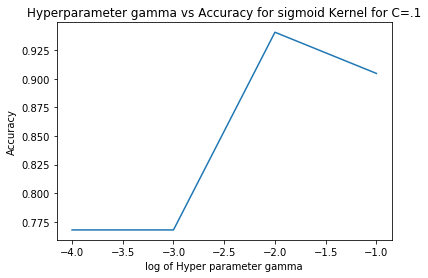

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
sigmoid_list = [.0001,.0005,.001,.01,.1]
accuracy_list = []
C_params = []
for i in sigmoid_list:
    from sklearn.svm import SVC
    svclassifier = SVC(kernel='sigmoid',C=.1,gamma=i)
    array_scores = cross_val_score(svclassifier,X,y,cv=5)
    array_mean = array_scores.mean()
    accuracy_list.append(array_mean)
    print('Gamma=',i," Score =",array_mean)
    
    
plt.plot(np.log10(sigmoid_list),accuracy_list,label='Training')
plt.xlabel('log of Hyper parameter gamma')
plt.ylabel('Accuracy')  
plt.title('Hyperparameter gamma vs Accuracy for sigmoid Kernel for C=.1')
plt.show


# Hyperparameter gamma vs Accuracy for RBF Kernel (varying C parameter)

C =  0.0001    Gamma =  0.0001  Score = 0.7679199999999999
C =  0.0001    Gamma =  0.001  Score = 0.7679199999999999
C =  0.0001    Gamma =  0.01  Score = 0.7679199999999999
C =  0.0001    Gamma =  0.1  Score = 0.7679199999999999
C =  0.001    Gamma =  0.0001  Score = 0.7679199999999999
C =  0.001    Gamma =  0.001  Score = 0.7679199999999999
C =  0.001    Gamma =  0.01  Score = 0.7679199999999999
C =  0.001    Gamma =  0.1  Score = 0.7679199999999999
C =  0.01    Gamma =  0.0001  Score = 0.7679199999999999
C =  0.01    Gamma =  0.001  Score = 0.7679199999999999
C =  0.01    Gamma =  0.01  Score = 0.7745599999999999
C =  0.01    Gamma =  0.1  Score = 0.83836
C =  0.1    Gamma =  0.0001  Score = 0.7679199999999999
C =  0.1    Gamma =  0.001  Score = 0.7921999999999999
C =  0.1    Gamma =  0.01  Score = 0.9490000000000001
C =  0.1    Gamma =  0.1  Score = 0.9571999999999999


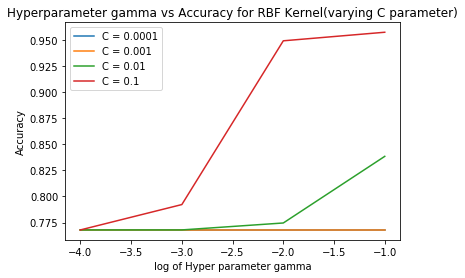

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
gamma_list = [.0001,.001,.01,.1]
accuracy_list = []
C_list = [.0001, .001, .01, .1]

for i in C_list:
    array_mean = 0
    accuracy_list = []
    for j in gamma_list:
        from sklearn.svm import SVC
        svclassifier = SVC(kernel='rbf',C=i,gamma=j)
        array_scores = cross_val_score(svclassifier,X,y,cv=5)
        array_mean = array_scores.mean()
        accuracy_list.append(array_mean)
        print('C = ', i , '   Gamma = ',j," Score =",array_mean)

    plt.plot(np.log10(gamma_list),accuracy_list,label='C = '+str(i))
    plt.xlabel('log of Hyper parameter gamma')
    plt.ylabel('Accuracy')  
    plt.title('Hyperparameter gamma vs Accuracy for RBF Kernel(varying C parameter)')
    plt.legend()
    plt.show


# Hyperparameter gamma vs Accuracy for sigmoid Kernel(varying C parameter)

C =  0.0001    Gamma =  0.0001  Score = 0.7679199999999999
C =  0.0001    Gamma =  0.001  Score = 0.7679199999999999
C =  0.0001    Gamma =  0.01  Score = 0.7679199999999999
C =  0.0001    Gamma =  0.1  Score = 0.7679199999999999
C =  0.001    Gamma =  0.0001  Score = 0.7679199999999999
C =  0.001    Gamma =  0.001  Score = 0.7679199999999999
C =  0.001    Gamma =  0.01  Score = 0.7679199999999999
C =  0.001    Gamma =  0.1  Score = 0.7679199999999999
C =  0.01    Gamma =  0.0001  Score = 0.7679199999999999
C =  0.01    Gamma =  0.001  Score = 0.7679199999999999
C =  0.01    Gamma =  0.01  Score = 0.7679199999999999
C =  0.01    Gamma =  0.1  Score = 0.9370799999999999
C =  0.1    Gamma =  0.0001  Score = 0.7679199999999999
C =  0.1    Gamma =  0.001  Score = 0.7679199999999999
C =  0.1    Gamma =  0.01  Score = 0.9407599999999998
C =  0.1    Gamma =  0.1  Score = 0.9047599999999999


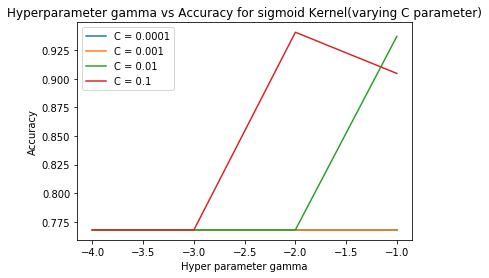

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
sigmoid_list = [.0001,.001,.01,.1]
accuracy_list = []
C_list = [.0001, .001, .01, .1]

for i in C_list:
    array_mean = 0
    accuracy_list = []
    for j in sigmoid_list:
        from sklearn.svm import SVC
        svclassifier = SVC(kernel='sigmoid',C=i,gamma=j)
        array_scores = cross_val_score(svclassifier,X,y,cv=5)
        array_mean = array_scores.mean()
        accuracy_list.append(array_mean)
        print('C = ', i , '   Gamma = ',j," Score =",array_mean)

    plt.plot(np.log10(sigmoid_list),accuracy_list,label='C = '+str(i))
    plt.xlabel('Hyper parameter gamma')
    plt.ylabel('Accuracy')  
    plt.title('Hyperparameter gamma vs Accuracy for sigmoid Kernel(varying C parameter)')
    plt.legend()
    plt.show

# GRID SEARCH TO FIND THE BEST PARAMETERS

In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.0001,.0005,.001,.01,.1], 
              'gamma': [0.0001,.0005,.001,.01,.1],
              'kernel': ['linear','rbf', 'sigmoid']}

In [43]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X,y)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] C=0.0001, gamma=0.0001, kernel=linear ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ C=0.0001, gamma=0.0001, kernel=linear, total=   5.2s
[CV] C=0.0001, gamma=0.0001, kernel=linear ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s


[CV] ............ C=0.0001, gamma=0.0001, kernel=linear, total=   5.4s
[CV] C=0.0001, gamma=0.0001, kernel=linear ...........................
[CV] ............ C=0.0001, gamma=0.0001, kernel=linear, total=   5.5s
[CV] C=0.0001, gamma=0.0001, kernel=linear ...........................
[CV] ............ C=0.0001, gamma=0.0001, kernel=linear, total=   5.1s
[CV] C=0.0001, gamma=0.0001, kernel=linear ...........................
[CV] ............ C=0.0001, gamma=0.0001, kernel=linear, total=   5.3s
[CV] C=0.0001, gamma=0.0001, kernel=rbf ..............................
[CV] ............... C=0.0001, gamma=0.0001, kernel=rbf, total=   8.9s
[CV] C=0.0001, gamma=0.0001, kernel=rbf ..............................
[CV] ............... C=0.0001, gamma=0.0001, kernel=rbf, total=   7.8s
[CV] C=0.0001, gamma=0.0001, kernel=rbf ..............................
[CV] ............... C=0.0001, gamma=0.0001, kernel=rbf, total=   7.5s
[CV] C=0.0001, gamma=0.0001, kernel=rbf ..............................
[CV] .

[CV] ............. C=0.0001, gamma=0.01, kernel=sigmoid, total=  10.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] ............... C=0.0001, gamma=0.1, kernel=linear, total=   5.5s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] ............... C=0.0001, gamma=0.1, kernel=linear, total=   5.3s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] ............... C=0.0001, gamma=0.1, kernel=linear, total=   5.6s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] ............... C=0.0001, gamma=0.1, kernel=linear, total=   6.1s
[CV] C=0.0001, gamma=0.1, kernel=linear ..............................
[CV] ............... C=0.0001, gamma=0.1, kernel=linear, total=   5.5s
[CV] C=0.0001, gamma=0.1, kernel=rbf .................................
[CV] .................. C=0.0001, gamma=0.1, kernel=rbf, total=   9.0s
[CV] C=0.0001, gamma=0.1, kernel=rbf .................................
[CV] .

[CV] ............ C=0.0005, gamma=0.001, kernel=sigmoid, total=  10.7s
[CV] C=0.0005, gamma=0.001, kernel=sigmoid ...........................
[CV] ............ C=0.0005, gamma=0.001, kernel=sigmoid, total=  11.0s
[CV] C=0.0005, gamma=0.001, kernel=sigmoid ...........................
[CV] ............ C=0.0005, gamma=0.001, kernel=sigmoid, total=   9.8s
[CV] C=0.0005, gamma=0.01, kernel=linear .............................
[CV] .............. C=0.0005, gamma=0.01, kernel=linear, total=   4.9s
[CV] C=0.0005, gamma=0.01, kernel=linear .............................
[CV] .............. C=0.0005, gamma=0.01, kernel=linear, total=   5.5s
[CV] C=0.0005, gamma=0.01, kernel=linear .............................
[CV] .............. C=0.0005, gamma=0.01, kernel=linear, total=   4.8s
[CV] C=0.0005, gamma=0.01, kernel=linear .............................
[CV] .............. C=0.0005, gamma=0.01, kernel=linear, total=   4.9s
[CV] C=0.0005, gamma=0.01, kernel=linear .............................
[CV] .

[CV] ............ C=0.001, gamma=0.0005, kernel=sigmoid, total=  15.2s
[CV] C=0.001, gamma=0.0005, kernel=sigmoid ...........................
[CV] ............ C=0.001, gamma=0.0005, kernel=sigmoid, total=  15.6s
[CV] C=0.001, gamma=0.0005, kernel=sigmoid ...........................
[CV] ............ C=0.001, gamma=0.0005, kernel=sigmoid, total=  15.4s
[CV] C=0.001, gamma=0.0005, kernel=sigmoid ...........................
[CV] ............ C=0.001, gamma=0.0005, kernel=sigmoid, total=  13.1s
[CV] C=0.001, gamma=0.0005, kernel=sigmoid ...........................
[CV] ............ C=0.001, gamma=0.0005, kernel=sigmoid, total=  11.8s
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV] .............. C=0.001, gamma=0.001, kernel=linear, total=   5.3s
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV] .............. C=0.001, gamma=0.001, kernel=linear, total=   6.5s
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV] .

[CV] ................. C=0.01, gamma=0.0001, kernel=rbf, total=  17.0s
[CV] C=0.01, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=0.01, gamma=0.0001, kernel=rbf, total=  16.7s
[CV] C=0.01, gamma=0.0001, kernel=sigmoid ............................
[CV] ............. C=0.01, gamma=0.0001, kernel=sigmoid, total=  18.0s
[CV] C=0.01, gamma=0.0001, kernel=sigmoid ............................
[CV] ............. C=0.01, gamma=0.0001, kernel=sigmoid, total=  17.4s
[CV] C=0.01, gamma=0.0001, kernel=sigmoid ............................
[CV] ............. C=0.01, gamma=0.0001, kernel=sigmoid, total=  17.8s
[CV] C=0.01, gamma=0.0001, kernel=sigmoid ............................
[CV] ............. C=0.01, gamma=0.0001, kernel=sigmoid, total=  18.4s
[CV] C=0.01, gamma=0.0001, kernel=sigmoid ............................
[CV] ............. C=0.01, gamma=0.0001, kernel=sigmoid, total=  17.9s
[CV] C=0.01, gamma=0.0005, kernel=linear .............................
[CV] .

[CV] .................... C=0.01, gamma=0.1, kernel=rbf, total=  11.7s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=0.01, gamma=0.1, kernel=rbf, total=  11.8s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=0.01, gamma=0.1, kernel=rbf, total=  12.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=0.01, gamma=0.1, kernel=rbf, total=  13.8s
[CV] C=0.01, gamma=0.1, kernel=sigmoid ...............................
[CV] ................ C=0.01, gamma=0.1, kernel=sigmoid, total=  12.8s
[CV] C=0.01, gamma=0.1, kernel=sigmoid ...............................
[CV] ................ C=0.01, gamma=0.1, kernel=sigmoid, total=  12.0s
[CV] C=0.01, gamma=0.1, kernel=sigmoid ...............................
[CV] ................ C=0.01, gamma=0.1, kernel=sigmoid, total=  11.7s
[CV] C=0.01, gamma=0.1, kernel=sigmoid ...............................
[CV] .

[CV] ................. C=0.1, gamma=0.01, kernel=linear, total=   4.8s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=  15.7s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=  21.9s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=  16.8s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=  12.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   8.3s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=  17.5s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed: 66.9min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.0005, 0.001, 0.01, 0.1],
                         'gamma': [0.0001, 0.0005, 0.001, 0.01, 0.1],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [44]:
print(grid.best_estimator_)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [45]:
svclassifier = SVC(kernel='rbf',C=0.1,gamma=0.1)
array_scores = cross_val_score(svclassifier,X,y,cv=5)
Accuracy = array_scores.mean()
print(Accuracy)

0.9546800000000001
